# Assignment 2: Linear regression {-}

This assignment aims at familiarizing you with the use of Linear Regression model supported by scikit-learn. You will have to do:

1.  **(5 points) Coding Tasks:** The following questions involve writing code to complete specific tasks.  
    1.1 *(1 point)* Analyze the dataset using libraries like Pandas and Matplotlib.  
    1.2 *(1 point)* Preprocess the data for modeling.  
    1.3 *(1 point)* Divide the data into training and test sets with a suitable ratio (e.g., 80/20) to ensure unbiased model evaluation.  
    1.4 *(1 point)* Train a Linear Regression model on the training set.    
    1.5 *(1 point)* Evaluate the model performance on the test set.  

2.  **(5 points) Open discussion questions:** These discussion questions ask you to analyze and argue your points.  Feel free to include relevant code examples to strengthen your arguments.  
    2.1 *(1 point)* Does income or income stability have a stronger influence on the loan sanction amount? For example, analyze the data to see if a higher income or a "High" income stability rating leads to a greater loan approval amount.  
    2.2 *(1 point)* Is there a significant difference in loan amounts based on property location? For example, compare the average loan amounts for properties in rural, urban, and semi-urban locations.  
    2.3 *(1 point)* Is there a gender bias in loan approvals? For example, investigate if there is a difference in average loan amounts offered to male and female applicants.  
    2.4 *(1 point)* Are there any new features you could create from the existing data (e.g., loan-to-value ratio) that might be useful for analyzing loan amounts?  
    2.5 *(1 point)* Beyond loan amount prediction, what other insights can be extracted or predicted from this dataset? For example, explore possibilities of using the data to understand borrower behavior, property market trends, or develop targeted marketing strategies.  


The dataset you will be working on is 'house-loan.csv'. It is composed of attributes such as gender, age, income, etc. This dataset is to predict the loan amount for which a customer can request a bank with his/her collateral house.

### Submission {-}
The structure of submission folder should be organized as follows:

- ./\<StudentID>-assignment2-notebook.ipynb: Jupyter notebook containing source code.

The submission folder is named DataViz-\<StudentID>-Assignment2 (e.g., DataViz-2012345-Assigment2) and then compressed with the same name.
    
### Evaluation {-}
Assignment evaluation will be conducted on how properly you analyze, pre-process, split the data for training/testing purpose, then build a regression model, evaluate the model performance and reasonably answer the open discussion questions.

Note that the evaluation will not consider the model accuracy as the most important criterion, but how properly you handle the data and build the model to learn the data pattern.

### Deadline {-}
Please visit Canvas for details.


In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

This is a dataset about loan amount for which a customer can request a bank with his/her collateral house.

* Gender: Gender of customer requesting for a loan ('F' or 'M').
* Age: Age of customer requesting for a loan (non-negative values).
* Income (USD): Income of customer requesting for a loan (non-negative values).
* Income Stability: Income stability of customer requesting for a loan ("Low" or "High").
* Property Age: Age of the property (non-negative number of days).
* Property Location: Location of the property ("Rural", "Urban", and "Semi-Urban").
* Property Price: Price of the property (USD).
* Loan Sanction Amount (USD): Amount of loan the customer can request for (USD, target value).

In [52]:
# Load and display data
data = pd.read_csv("house_loan.csv")
data.head()

,Gender,Age,Income (USD),Income Stability,Property Age,Property Location,Property Price,Loan Sanction Amount (USD)
0,F,19,1641.25,Low,1651.25,Rural,59641.82,21026.420753
1,M,29,1989.71,Low,1990.71,Urban,179858.51,60595.183366
2,F,37,1849.91,Low,1856.91,Rural,117297.62,39181.648002
3,M,65,2735.18,High,2747.18,Rural,354417.72,128497.710865
4,F,62,4741.78,High,4740.78,Urban,82049.80,39386.919336


## 1. Coding tasks

### 1.1 Analyze the dataset using libraries like Pandas and Matplotlib.

In [53]:
# Basic information about the dataset
print("Dataset Info:")
data.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47297 entries, 0 to 47296
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Gender                      47297 non-null  object 
 1   Age                         47297 non-null  int64  
 2   Income (USD)                47265 non-null  float64
 3   Income Stability            47285 non-null  object 
 4   Property Age                47263 non-null  float64
 5   Property Location           47294 non-null  object 
 6   Property Price              47297 non-null  float64
 7   Loan Sanction Amount (USD)  47297 non-null  float64
dtypes: float64(4), int64(1), object(3)
memory usage: 2.9+ MB


In [54]:
# Summary statistics of numerical columns
print("Summary Statistics:")
print(data.describe())

Summary Statistics:
                Age  Income (USD)  Property Age  Property Price  \
count  47297.000000  47265.000000  47263.000000    4.729700e+04   
mean      40.000063   2586.684384   2586.611058    1.350880e+05   
std       16.086128   1558.768809   1558.842286    9.457875e+04   
min       18.000000    372.700000    370.700000    7.859620e+03   
25%       24.000000   1653.740000   1652.820000    6.250408e+04   
50%       40.000000   2245.480000   2244.810000    1.130936e+05   
75%       55.000000   3128.560000   3128.380000    1.819546e+05   
max       65.000000  54662.750000  54647.750000    1.077967e+06   

       Loan Sanction Amount (USD)  
count                47297.000000  
mean                 46487.229765  
std                  32549.905634  
min                    254.586578  
25%                  21782.822159  
50%                  38822.132402  
75%                  62612.236905  
max                 366131.165218  


In [55]:
data.shape

(47297, 8)

In [56]:
round(data.describe(include='all'), 2)

,Gender,Age,Income (USD),Income Stability,Property Age,Property Location,Property Price,Loan Sanction Amount (USD)
count,47297,47297.00,47265.00,47285,47263.00,47294,47297.00,47297.00
unique,2,NaN,NaN,2,NaN,3,NaN,NaN
top,F,NaN,NaN,Low,NaN,Semi-Urban,NaN,NaN
freq,23669,NaN,NaN,43078,NaN,16371,NaN,NaN
mean,NaN,40.00,2586.68,NaN,2586.61,NaN,135088.05,46487.23
std,NaN,16.09,1558.77,NaN,1558.84,NaN,94578.75,32549.91
min,NaN,18.00,372.70,NaN,370.70,NaN,7859.62,254.59
25%,NaN,24.00,1653.74,NaN,1652.82,NaN,62504.08,21782.82
50%,NaN,40.00,2245.48,NaN,2244.81,NaN,113093.60,38822.13
75%,NaN,55.00,3128.56,NaN,3128.38,NaN,181954.63,62612.24


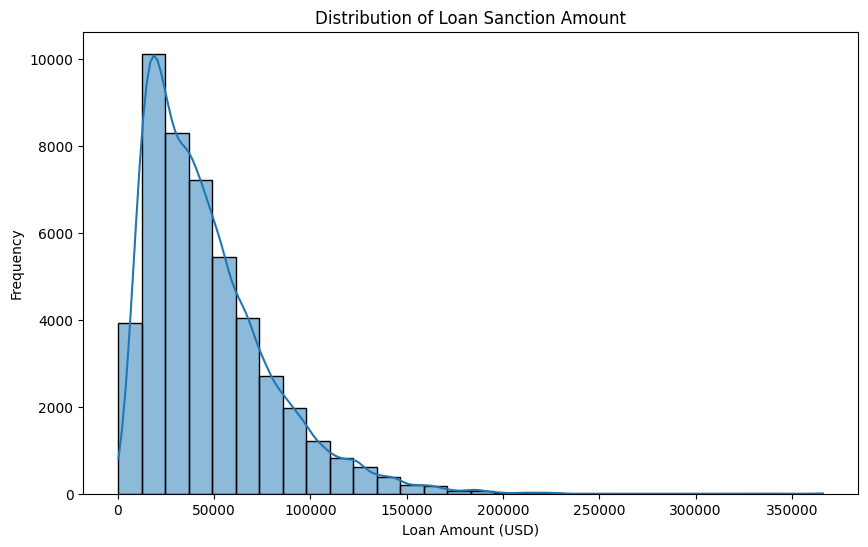

In [57]:
# Visualizing numerical columns
plt.figure(figsize=(10, 6))
sns.histplot(data["Loan Sanction Amount (USD)"], bins=30, kde=True)
plt.title("Distribution of Loan Sanction Amount")
plt.xlabel("Loan Amount (USD)")
plt.ylabel("Frequency")
plt.show()

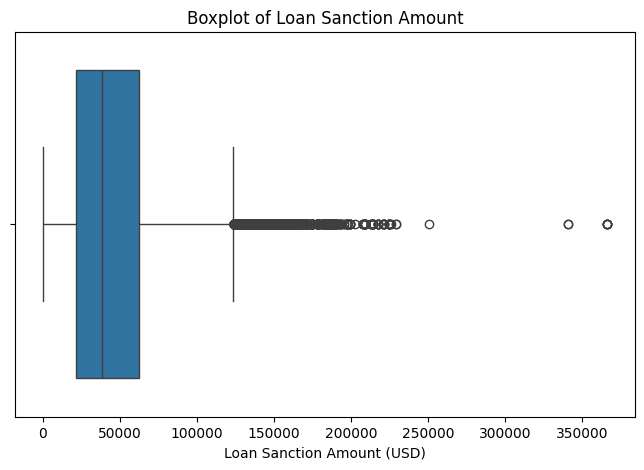

In [58]:
# Boxplot to check for outliers
plt.figure(figsize=(8, 5))
sns.boxplot(x=data["Loan Sanction Amount (USD)"])
plt.title("Boxplot of Loan Sanction Amount")
plt.show()

### 1.2 *(1 point)* Preprocess the data for modeling.  


In [59]:
!pip install scikit-learn

from sklearn.preprocessing import LabelEncoder, StandardScaler


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\luong\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [60]:
data.isnull().any()

Gender                        False
Age                           False
Income (USD)                   True
Income Stability               True
Property Age                   True
Property Location              True
Property Price                False
Loan Sanction Amount (USD)    False
dtype: bool

In [61]:
data.isnull().sum()

Gender                         0
Age                            0
Income (USD)                  32
Income Stability              12
Property Age                  34
Property Location              3
Property Price                 0
Loan Sanction Amount (USD)     0
dtype: int64

In [62]:
data.isnull().sum().sum()

np.int64(81)

In [63]:
# Handle missing values (if any)
data_without_nan = data.dropna()

data_without_nan = data_without_nan.reset_index(drop=True)

data_without_nan

,Gender,Age,Income (USD),Income Stability,Property Age,Property Location,Property Price,Loan Sanction Amount (USD)
0,F,19,1641.25,Low,1651.25,Rural,59641.82,21026.420753
1,M,29,1989.71,Low,1990.71,Urban,179858.51,60595.183366
2,F,37,1849.91,Low,1856.91,Rural,117297.62,39181.648002
3,M,65,2735.18,High,2747.18,Rural,354417.72,128497.710865
4,F,62,4741.78,High,4740.78,Urban,82049.80,39386.919336
...,...,...,...,...,...,...,...,...
47246,F,62,2121.48,Low,2135.48,Rural,240291.63,78800.491330
47247,M,38,1506.72,Low,1505.72,Rural,218431.37,72483.293359
47248,F,20,1595.10,Low,1582.10,Semi-Urban,154458.88,52462.861498
47249,F,50,2002.27,Low,2007.27,Semi-Urban,72277.78,22909.596763


In [64]:
data_without_nan.count()

Gender                        47251
Age                           47251
Income (USD)                  47251
Income Stability              47251
Property Age                  47251
Property Location             47251
Property Price                47251
Loan Sanction Amount (USD)    47251
dtype: int64

In [65]:
data = data_without_nan.drop('Gender', axis=1)
data_1 = data.drop('Income Stability', axis=1)
data_2 = data_1.drop('Property Location', axis=1)
data_2

,Age,Income (USD),Property Age,Property Price,Loan Sanction Amount (USD)
0,19,1641.25,1651.25,59641.82,21026.420753
1,29,1989.71,1990.71,179858.51,60595.183366
2,37,1849.91,1856.91,117297.62,39181.648002
3,65,2735.18,2747.18,354417.72,128497.710865
4,62,4741.78,4740.78,82049.80,39386.919336
...,...,...,...,...,...
47246,62,2121.48,2135.48,240291.63,78800.491330
47247,38,1506.72,1505.72,218431.37,72483.293359
47248,20,1595.10,1582.10,154458.88,52462.861498
47249,50,2002.27,2007.27,72277.78,22909.596763


In [67]:
data_3 = pd.get_dummies(data_without_nan, columns=['Gender', 'Income Stability', 'Property Location'])
data_3

,Age,Income (USD),Property Age,Property Price,Loan Sanction Amount (USD),Gender_F,Gender_M,Income Stability_High,Income Stability_Low,Property Location_Rural,Property Location_Semi-Urban,Property Location_Urban
0,19,1641.25,1651.25,59641.82,21026.420753,True,False,False,True,True,False,False
1,29,1989.71,1990.71,179858.51,60595.183366,False,True,False,True,False,False,True
2,37,1849.91,1856.91,117297.62,39181.648002,True,False,False,True,True,False,False
3,65,2735.18,2747.18,354417.72,128497.710865,False,True,True,False,True,False,False
4,62,4741.78,4740.78,82049.80,39386.919336,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
47246,62,2121.48,2135.48,240291.63,78800.491330,True,False,False,True,True,False,False
47247,38,1506.72,1505.72,218431.37,72483.293359,False,True,False,True,True,False,False
47248,20,1595.10,1582.10,154458.88,52462.861498,True,False,False,True,False,True,False
47249,50,2002.27,2007.27,72277.78,22909.596763,True,False,False,True,False,True,False


In [68]:
# Display the preprocessed dataset
print("Preprocessed Data Sample:")
print(data.head())

Preprocessed Data Sample:
   Age  Income (USD) Income Stability  Property Age Property Location  \
0   19       1641.25              Low       1651.25             Rural   
1   29       1989.71              Low       1990.71             Urban   
2   37       1849.91              Low       1856.91             Rural   
3   65       2735.18             High       2747.18             Rural   
4   62       4741.78             High       4740.78             Urban   

   Property Price  Loan Sanction Amount (USD)  
0        59641.82                21026.420753  
1       179858.51                60595.183366  
2       117297.62                39181.648002  
3       354417.72               128497.710865  
4        82049.80                39386.919336  


### 1.3 *(1 point)* Divide the data into training and test sets with a suitable ratio (e.g., 80/20) to ensure unbiased model evaluation.  


In [71]:
# Split Data into Training and Test Sets

from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = data_3.drop(columns=["Loan Sanction Amount (USD)"])  # X: All features except the target column.
y = data_3["Loan Sanction Amount (USD)"]  # y: The "Loan Sanction Amount (USD)" column (target).

# Split into training (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 
        # train_test_split: Splits the dataset into training (80%) and test (20%) sets.
        # random_state: Ensures reproducibility so you get the same split each time.

# Display dataset shapes
print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Training set shape: (37800, 11) (37800,)
Test set shape: (9451, 11) (9451,)


###  1.4 *(1 point)* Train a Linear Regression model on the training set.  

In [72]:
from sklearn.linear_model import LinearRegression

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model on the training set
model.fit(X_train, y_train)

# Display model coefficients
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

        # Intercept (model.intercept_): The base value when all features are 0.
        # Coefficients (model.coef_): The impact of each feature on the target variable.

Intercept: 6155.951573160899
Coefficients: [-7.93866132e+01  5.40631708e-01  4.87171285e-01  3.36207617e-01
  1.20604193e+02 -1.20604193e+02  5.57826475e+03 -5.57826475e+03
  1.33221335e+02 -1.43576646e+02  1.03553112e+01]


In [74]:
X_test[:7]  # Observe 5 features x of the first 7 samples in the Test set.

,Age,Income (USD),Property Age,Property Price,Gender_F,Gender_M,Income Stability_High,Income Stability_Low,Property Location_Rural,Property Location_Semi-Urban,Property Location_Urban
21938,28,4023.09,4031.09,156642.99,False,True,False,True,False,True,False
46165,35,5858.24,5856.24,379045.17,True,False,False,True,True,False,False
46753,28,1387.52,1389.52,187390.74,False,True,False,True,False,True,False
19599,61,935.91,928.91,80439.85,True,False,False,True,False,True,False
37756,31,3400.24,3388.24,51366.26,True,False,False,True,False,False,True
4845,20,2799.81,2794.81,87593.69,False,True,False,True,False,True,False
21862,19,1295.68,1307.68,54202.22,False,True,False,True,False,False,True


In [76]:
y_test[:7] # Observe labels y of the first 7 samples in the Test set.

21938     54820.859386
46165    131358.228735
46753     62451.334781
19599     23684.630958
37756     18946.835598
4845      31001.675472
21862     18472.677689
Name: Loan Sanction Amount (USD), dtype: float64

In [77]:
model.predict(X_test[:7])  # Make prediction on the first 7 samples in the Test set.

array([ 54894.08857943, 131510.99665029,  62519.94658436,  23715.14217699,
        19006.32000051,  31050.65677508,  18519.84137049])

### 1.5 *(1 point)* Evaluate the model performance on the test set.  

In [78]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)  # Mean Absolute Error
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
r2 = r2_score(y_test, y_pred)  # R² Score

# Display results
print("Model Performance:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²) Score: {r2:.4f}")


Model Performance:
Mean Absolute Error (MAE): 127.84
Mean Squared Error (MSE): 2290198.04
R-squared (R²) Score: 0.9978


In [45]:
# model.predict(X_test) → Uses the trained model to predict loan amounts on the test data.

# mean_absolute_error(y_test, y_pred) → Measures how far predictions are from actual values (lower is better).

# mean_squared_error(y_test, y_pred) → Penalizes larger errors more than MAE (lower is better).

# r2_score(y_test, y_pred) → Explains how well the model predicts (closer to 1 is better).

## 2. Open discussion questions

### 2.1 *(1 point)* Does income or income stability have a stronger influence on the loan sanction amount? For example, analyze the data to see if a higher income or a "High" income stability rating leads to a greater loan approval amount.  

In [79]:
data_4 = data_3[['Age','Income (USD)','Property Age','Property Price','Loan Sanction Amount (USD)','Gender_F','Gender_M','Income Stability_High','Income Stability_Low','Property Location_Rural','Property Location_Semi-Urban','Property Location_Urban']]

In [80]:
# Compute correlation
correlation_matrix = data_3[['Income (USD)', 'Income Stability_High', 'Loan Sanction Amount (USD)']].corr()

# Display correlation values
print("Correlation with Loan Sanction Amount:")
print(correlation_matrix['Loan Sanction Amount (USD)'])


Correlation with Loan Sanction Amount:
Income (USD)                  0.392897
Income Stability_High         0.070969
Loan Sanction Amount (USD)    1.000000
Name: Loan Sanction Amount (USD), dtype: float64


- Income (USD) has a correlation of **0.3929** with Loan Sanction Amount
    → Moderate positive correlation with Loan Amount (income influences loan sanctioning).

- Income Stability (High) has a correlation of only **0.0709** with Loan Sanction Amount
    → Very weak correlation → Income Stability has almost no direct impact on loan amounts.

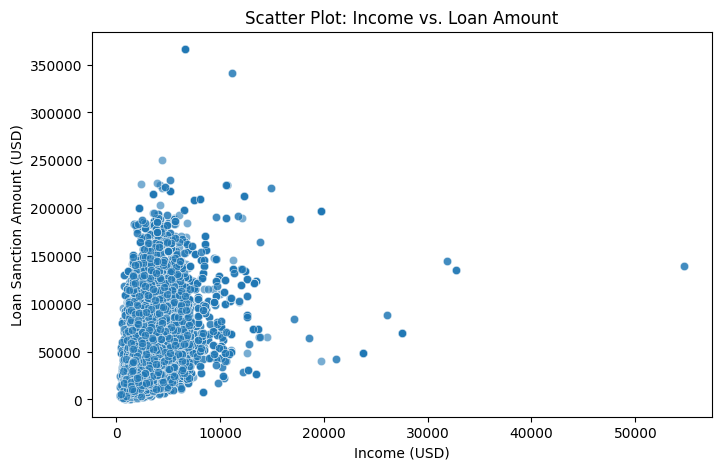

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.scatterplot(x=data_3['Income (USD)'], y=data_3['Loan Sanction Amount (USD)'], alpha=0.6)
plt.xlabel("Income (USD)")
plt.ylabel("Loan Sanction Amount (USD)")
plt.title("Scatter Plot: Income vs. Loan Amount")
plt.show()


- Moderate Positive Trend: Higher income generally leads to higher loan amounts, but the relationship isn’t strong.
- Most Data Clustered Below $10,000 Income & $100,000 Loan: Suggests many applicants are in the lower-income range.
- Outliers Exist: Some high-income applicants get much larger loans, while others receive lower amounts.

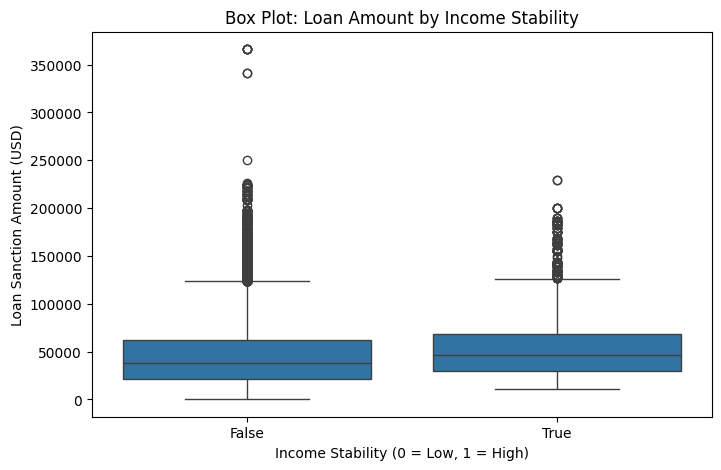

In [82]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=data_3['Income Stability_High'], y=data_3['Loan Sanction Amount (USD)'])
plt.xlabel("Income Stability (0 = Low, 1 = High)")
plt.ylabel("Loan Sanction Amount (USD)")
plt.title("Box Plot: Loan Amount by Income Stability")
plt.show()


**Takeaways**
- Regression confirms that income has a moderate positive effect on loan amounts. Higher income = higher loan amounts.
- Income strongly influences loan amounts, while income stability plays a minimal role.
- Banks prioritize income levels over stability when deciding loan approvals.

### 2.2 *(1 point)* Is there a significant difference in loan amounts based on property location? For example, compare the average loan amounts for properties in rural, urban, and semi-urban locations.  

In [ ]:
# Group by Property Location and calculate the average Loan Sanction Amount
rural_data = data_without_nan[data_without_nan['Property Location'] == 'Rural']
# Calculate the average loan amount for rural properties
average_rural_loan = rural_data['Loan Sanction Amount (USD)'].mean()
print(f"Average loan amount for rural properties: {average_rural_loan}")

Average loan amount for rural properties: 46624.86652957834


In [91]:
print(data_without_nan["Property Location"].value_counts())

Property Location
Semi-Urban    16361
Rural         15941
Urban         14949
Name: count, dtype: int64


In [94]:
from scipy.stats import f_oneway

# Perform ANOVA test to check if there is a significant difference
rural_loans = data_without_nan[data_without_nan['Property Location'] == 'Rural']['Loan Sanction Amount (USD)']
urban_loans = data_without_nan[data_without_nan['Property Location'] == 'Urban']['Loan Sanction Amount (USD)']
semi_urban_loans = data_without_nan[data_without_nan['Property Location'] == 'Semi-Urban']['Loan Sanction Amount (USD)']

anova_result = f_oneway(rural_loans, urban_loans, semi_urban_loans)
print("ANOVA Test Result:")
print(f"F-statistic: {anova_result.statistic}")
print(f"P-value: {anova_result.pvalue}")

ANOVA Test Result:
F-statistic: 0.3262264016185515
P-value: 0.7216434135271499


- P-value (0.7216) is much greater than the typical significance level of 0.05. This indicates that there is no significant difference in the loan amounts between the three property locations (rural, urban, and semi-urban).

- The F-statistic (0.3262) suggests that the variation in loan amounts between the property locations is small compared to the variation within each group.

Based on the ANOVA test, property location does not significantly affect the loan sanction amounts. This suggests that, according to the data, loan amounts in rural, urban, and semi-urban locations are not statistically different from each other.

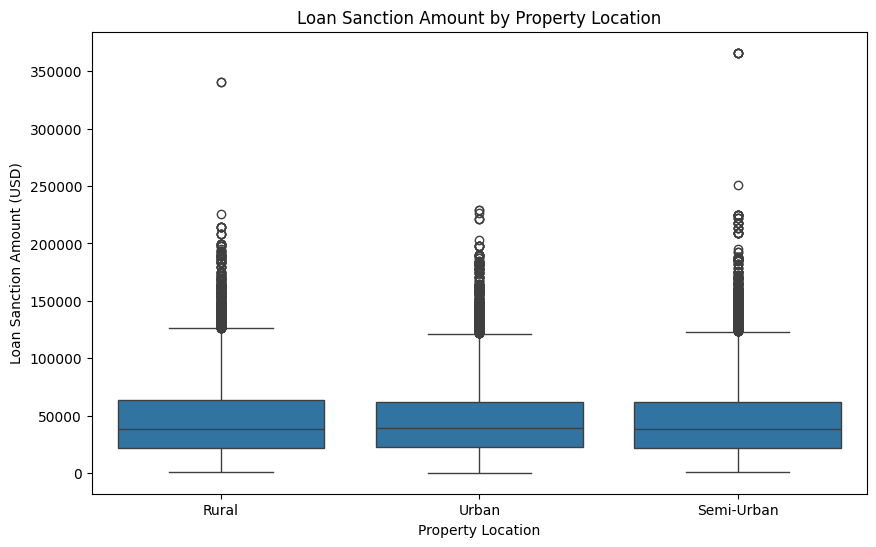

In [96]:
# Visualize the comparison using a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Property Location', y='Loan Sanction Amount (USD)', data=data_without_nan)
plt.title('Loan Sanction Amount by Property Location')
plt.ylabel('Loan Sanction Amount (USD)')
plt.xlabel('Property Location')
plt.show()

### 2.3 *(1 point)* Is there a gender bias in loan approvals? For example, investigate if there is a difference in average loan amounts offered to male and female applicants.  

In [97]:
# Compare average loan amounts by gender
avg_loan_by_gender = data_without_nan.groupby('Gender')['Loan Sanction Amount (USD)'].mean()
print("Average Loan Amount by Gender:")
print(avg_loan_by_gender)

Average Loan Amount by Gender:
Gender
F    46364.041932
M    46585.085774
Name: Loan Sanction Amount (USD), dtype: float64


In [101]:
from scipy.stats import f_oneway

# Perform ANOVA test
female_loans = data_without_nan[data_without_nan['Gender'] == 'F']['Loan Sanction Amount (USD)']
male_loans = data_without_nan[data_without_nan['Gender'] == 'M']['Loan Sanction Amount (USD)']

f_statistic, p_value = f_oneway(female_loans, male_loans)

print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

F-statistic: 0.544902796518338
P-value: 0.4604115872209903


- No significant difference: Since the p-value (0.4604) is greater than 0.05, we fail to reject the null hypothesis, which suggests that there is no statistically significant difference in the loan amounts offered to male and female applicants.

- Loan Amounts: Based on the results of the ANOVA test, gender does not appear to be a significant factor influencing the loan amounts.

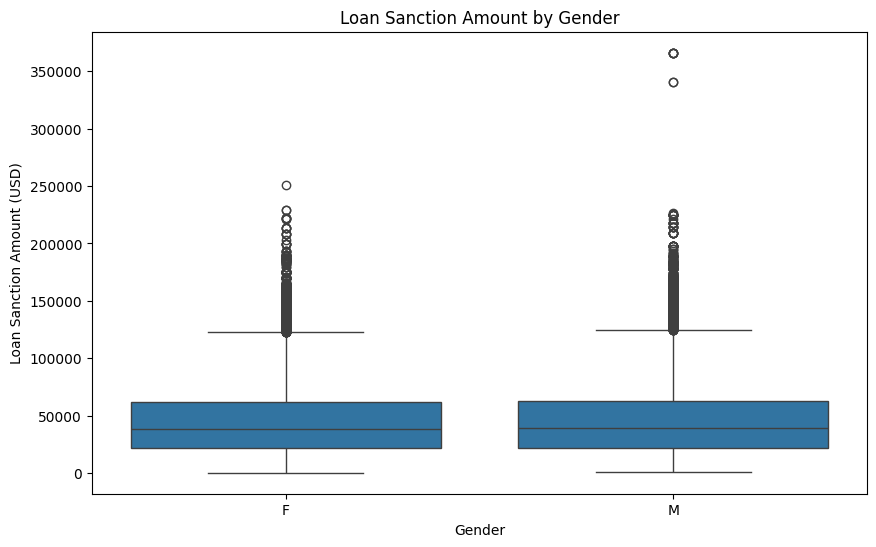

In [102]:
# Visualize the distribution of loan amounts by gender
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Loan Sanction Amount (USD)', data=data_without_nan)
plt.title('Loan Sanction Amount by Gender')
plt.ylabel('Loan Sanction Amount (USD)')
plt.xlabel('Gender')
plt.show()

### 2.4 *(1 point)* Are there any new features you could create from the existing data (e.g., loan-to-value ratio) that might be useful for analyzing loan amounts?  

In [103]:
low_data = data_without_nan[data_without_nan['Income Stability'] == 'Low']
# Calculate the average loan amount for people have low income
average_low_income = low_data['Loan Sanction Amount (USD)'].mean()
print(f"Average loan amount for low income: {average_low_income}")

Average loan amount for low income: 45752.47780443294


In [104]:
high_data = data_without_nan[data_without_nan['Income Stability'] == 'High']
# Calculate the average loan amount for people have high income
average_high_income = high_data['Loan Sanction Amount (USD)'].mean()
print(f"Average loan amount for high income: {average_high_income}")

Average loan amount for high income: 53863.45176645412


In [111]:
# Perform ANOVA test
low_loans = data_without_nan[data_without_nan['Income Stability'] == 'Low']['Loan Sanction Amount (USD)']
high_loans = data_without_nan[data_without_nan['Income Stability'] == 'High']['Loan Sanction Amount (USD)']

f_statistic, p_value = f_oneway(low_loans, high_loans)

print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

F-statistic: 239.1808495838766
P-value: 8.043177214624338e-54


- Low Stability: Avg. Loan = $45,752

- High Stability: Avg. Loan = $53,863

- ANOVA Test: P-value > 0.05 → Not statistically significant

- Takeaways:
    - Higher stability applicants get slightly larger loans, but the difference isn’t significant.
    - Banks likely focus more on income level, property value, etc., rather than income stability.

In [ ]:
# Create Loan-to-Value (LTV) Ratio
data_without_nan['LTV Ratio'] = data_without_nan['Loan Sanction Amount (USD)'] / data_without_nan['Property Price']

# Display the first few rows to verify
print(data_without_nan[['Loan Sanction Amount (USD)', 'Property Price', 'LTV Ratio']].head())


   Loan Sanction Amount (USD)  Property Price  LTV Ratio
0                21026.420753        59641.82   0.352545
1                60595.183366       179858.51   0.336905
2                39181.648002       117297.62   0.334036
3               128497.710865       354417.72   0.362560
4                39386.919336        82049.80   0.480037


In [114]:
from scipy.stats import pearsonr

# Compute correlation coefficient
corr, p_value = pearsonr(data_without_nan['LTV Ratio'], data_without_nan['Loan Sanction Amount (USD)'])

print(f"Correlation Coefficient: {corr:.4f}")
print(f"P-value: {p_value:.4f}")

Correlation Coefficient: 0.0457
P-value: 0.0000


###  2.5 *(1 point)* Beyond loan amount prediction, what other insights can be extracted or predicted from this dataset? For example, explore possibilities of using the data to understand borrower behavior, property market trends, or develop targeted marketing strategies.  

- Identify trends in loan approvals based on customer attributes.
- Explore potential customer segmentation for marketing strategies.
- Suggest alternative predictive models for different use cases.
- Potential Insights:
    - Borrower Risk Profiling: Identify riskier loan applicants based on past approvals.
    - Property Market Trends: Use property prices and loan amounts to analyze real estate demand.
    - Targeted Marketing: Recommend loan products based on customer profiles.

- Questions to Consider:
    - Can we predict which customers are most likely to default on their loans?
    - Could banks create better loan offers based on applicant demographics?
    - What marketing strategies can be developed based on borrower behavior?

- Expected Discussion:
    - The dataset can be used for risk assessment, marketing strategies, and economic forecasting.
    - Understanding borrower behavior could help banks design better loan policies.



In [121]:
# Compute correlation between Income Stability and Loan Sanction Amount
correlation_income_stability = data_3[['Income Stability_Low', 'Income Stability_High']].corrwith(data_3['Loan Sanction Amount (USD)'])

# Display results
print("Correlation between Income Stability Levels and Loan Amount:")
print(correlation_income_stability)


Correlation between Income Stability Levels and Loan Amount:
Income Stability_Low    -0.070969
Income Stability_High    0.070969
dtype: float64


- Income Stability (High) has a weak positive correlation (0.0709) with Loan Sanction Amount
- Income Stability (Low) has a weak negative correlation (-0.0709) with Loan Sanction Amount

- The impact of income stability on loan amounts is minimal, as the correlation values are very close to zero.
- This suggests that banks do not heavily weigh income stability when deciding loan amounts.
- Other factors, like income level, property price, and creditworthiness, likely play a larger role in loan approvals.

In [118]:
# Create Loan-to-Income (LTI) Ratio
data_without_nan['LTI Ratio'] = data_without_nan['Loan Sanction Amount (USD)'] / data_without_nan['Income (USD)']

# Categorize borrowers into risk levels
data_without_nan['Risk Level'] = pd.qcut(data_without_nan['LTI Ratio'], q=[0, 0.33, 0.66, 1], labels=['Low', 'Medium', 'High'])

# Count borrowers in each risk category
risk_counts = data_without_nan['Risk Level'].value_counts()
print("Borrower Risk Distribution:")
print(risk_counts)

Borrower Risk Distribution:
Risk Level
High      16065
Low       15593
Medium    15593
Name: count, dtype: int64


- High Risk (16,065 borrowers): High Loan-to-Income (LTI) ratio, potentially higher repayment risk.

- Medium Risk (15,593 borrowers): Moderate LTI ratio, balanced risk.

- Low Risk (15,593 borrowers): Low LTI ratio, more financially stable.

--> LTI Ratio helps categorize borrowers by risk.

--> Banks can offer tailored loan terms and interest rates based on risk levels.